# graficas del reto

In [1]:
#pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%ls datasets/

 adult.csv                   headbrain.csv
 airline_data.csv            mic2.xlsx
 antropometria00.csv         mic.xlsx
 antropometria-dataset.csv   movies.csv
 Book3.csv                   nhanes_2015_2016.csv
 Canada.xlsx                 pokemon.csv
 Cartwheeldata.csv           reg_data.csv
 census.csv                  sample_pivot.csv
 coches.csv                  tips.csv
 cwurData.csv               'Ventas PT PISA 2016_2021.xlsx'
 data.csv                    weight-height.csv
 Graficas_reto.xlsx


In [4]:
df = pd.read_excel('datasets/Graficas_reto.xlsx',
                   sheet_name='G4',
                   engine = 'openpyxl'
                  )
df.head()

,Meses,2019,2020,2021,Total general
0,ENE,558,1194.0,3192.0,4944
1,FEB,356,1234.0,-70.0,1520
2,MAR,2226,582.0,-5.0,2803
3,ABR,2104,93.0,-3.0,2194
4,MAY,608,2336.0,1.0,2945


In [5]:
df.columns

Index(['Meses', 2019, 2020, 2021, 'Total general'], dtype='object')

In [6]:
df.drop(['Total general'],
        axis = 1, inplace = True)

Text(0.5, 1.0, 'Bota llanera')

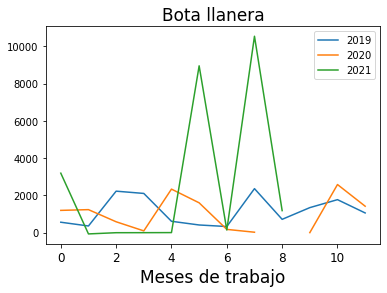

In [7]:
df.plot(kind = 'line')
plt.xlabel('Meses de trabajo', fontsize = 17)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.title('Bota llanera', fontsize = 17)

In [8]:
#pip install plotly

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
df = pd.read_excel('datasets/Ventas PT PISA 2016_2021.xlsx',
                   sheet_name='BDD',
                   engine = 'openpyxl'
                  )
df.head()

,País,Canal,Año natural,Mes natural,Organización de ventas,Grupo de artículos,Modelo,Familia,Tipo Mat,Línea,Marca,Articulo,Venta SKU,Venta USD
0,Bolivia,Exportación,2017,NOV,PLASTICAUCHO IND.,CALZADO LONA,ARGUS,ARGUS BAJO,ZFER,CALZADO LONA,VENUS,ARGUSBAJ/RJ-BL,350.0,1582.74
1,Bolivia,Exportación,2017,NOV,PLASTICAUCHO IND.,CALZADO LONA,ARGUS,ARGUS BAJO,ZFER,CALZADO LONA,VENUS,ARGUSBAJ3/BL-BL,945.0,4373.64
2,Bolivia,Exportación,2017,NOV,PLASTICAUCHO IND.,CALZADO LONA,ARGUS,ARGUS COLORES,ZFER,CALZADO LONA,VENUS,ARGUSBAJ/AZLAG-BL,517.0,2439.53
3,Bolivia,Exportación,2017,NOV,PLASTICAUCHO IND.,CALZADO LONA,DONNA,DONNA CLASICO,ZFER,CALZADO LONA,VENUS,DNN/BL-BL,522.0,1983.62
4,Bolivia,Exportación,2017,NOV,PLASTICAUCHO IND.,CALZADO LONA,DONNA,DONNA MOCASIN,ZFER,CALZADO LONA,VENUS,DNN MCS/AZDIND-BL,160.0,755.16


In [11]:
counts = df['Línea'].value_counts()
type(counts)
counts = counts.to_frame()
type(counts)
counts
counts['%'] = (counts.iloc[:,:]/counts.loc[:, 'Línea'].sum(axis = 0))*100
counts

,Línea,%
INDUSTRIAS DIVERSAS,10329,23.487277
BOTAS,7671,17.443209
CALZADO LONA,7645,17.384087
CALZADO RELAX,6866,15.612707
CALZADO ESCOLAR,6382,14.512131
CALZADO DEPORTIVO,3296,7.494827
CALZADO CASUAL,1094,2.487664
CALZADO VULCANIZADO,639,1.453032
ACCESORIOS CALZADO,42,0.095504
CALZADO EVA,13,0.029561


In [12]:
counts = counts.reindex(['INDUSTRIAS DIVERSAS', 'BOTAS', 'CALZADO LONA', 'CALZADO RELAX',
                        'CALZADO ESCOLAR', 'CALZADO DEPORTIVO', 'CALZADO CASUAL', 'CALZADO VULCANIZADO',
                        'ACCESORIOS CALZADO', 'CALZADO EVA'])
counts.reset_index(inplace = True)
counts

,index,Línea,%
0,INDUSTRIAS DIVERSAS,10329,23.487277
1,BOTAS,7671,17.443209
2,CALZADO LONA,7645,17.384087
3,CALZADO RELAX,6866,15.612707
4,CALZADO ESCOLAR,6382,14.512131
5,CALZADO DEPORTIVO,3296,7.494827
6,CALZADO CASUAL,1094,2.487664
7,CALZADO VULCANIZADO,639,1.453032
8,ACCESORIOS CALZADO,42,0.095504
9,CALZADO EVA,13,0.029561


In [13]:
counts = counts.rename({'index':'Modelo'}, axis = 1
                      )
counts

,Modelo,Línea,%
0,INDUSTRIAS DIVERSAS,10329,23.487277
1,BOTAS,7671,17.443209
2,CALZADO LONA,7645,17.384087
3,CALZADO RELAX,6866,15.612707
4,CALZADO ESCOLAR,6382,14.512131
5,CALZADO DEPORTIVO,3296,7.494827
6,CALZADO CASUAL,1094,2.487664
7,CALZADO VULCANIZADO,639,1.453032
8,ACCESORIOS CALZADO,42,0.095504
9,CALZADO EVA,13,0.029561


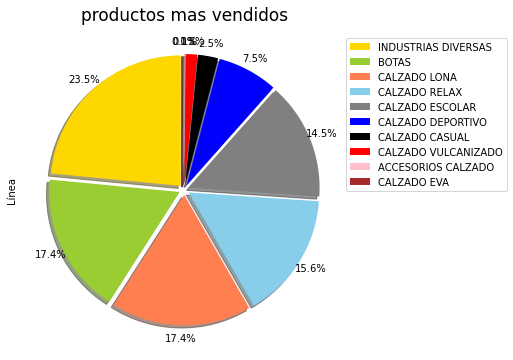

In [18]:
explode_list = [0.04,0.04,0.04,0.04, 0.04,0.04,0.04,0.04, 0.04,0.04] #separación de los trangulitos
clor_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'grey', 'blue', 'black', 'red', 'pink', 'brown']
counts['Línea'].plot(kind = 'pie',
                  figsize = (15, 6),
                   startangle = 90,
                   shadow = True,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.1,
                   explode = explode_list,
                   colors = clor_list,
                  )
plt.legend(labels = counts.Modelo,
           bbox_to_anchor = (0.98, 0.98)
          )
plt.title('productos mas vendidos', fontsize = 17, y = 1)
plt.show()

In [31]:
df = pd.read_excel('datasets/Graficas_reto.xlsx',
                   sheet_name='G1',
                   engine = 'openpyxl'
                  )

df.head()

,Linea,Suma de Venta SKU
0,ACCESORIOS CALZADO,528.0
1,BOTAS,10142352.0
2,CALZADO CASUAL,8529.0
3,CALZADO DEPORTIVO,609927.0
4,CALZADO ESCOLAR,3911800.0


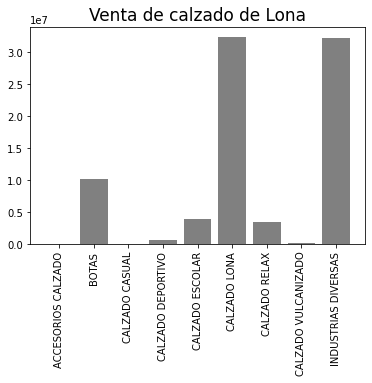

In [32]:
x = list(df['Linea'])
y = list(df['Suma de Venta SKU'])

plt.bar(x, y, color = 'grey')
plt.title('Venta de calzado de Lona', fontsize = 17, y = 1)

plt.xticks(fontsize = 10, rotation =90)
plt.yticks(fontsize = 10)
plt.show()